### Actividad de perceptrón y perceptrón multicapa
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Encontrar arquitecturas mínimas para el problema no lineal y el problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test a partir de otro conjunto de datos.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, fun, morosos, quinielas). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

In [32]:
import numpy as np

class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput
        self.noutput = noutput
        self.w = np.random.rand(ninput,noutput)-0.5
        self.b = np.random.rand(noutput)-0.5
        
    def forward (self, x): # propaga un vector x y devuelve la salida
        sumaPonderada = np.dot(x, self.w) + self.b # Directamente se puede hacer con el método dot. Primero x(inputs) que tiene de dimensión 1x2 y luego los pesos de dimensión 2x1. Al final se suma el bias.
        return np.where(sumaPonderada > 0, 1, 0)
        
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        
        # calcula actualización de pesos para una entrada x
        # a implementar
        self.b += alpha * (d-s)
        self.w += alpha* np.transpose([x]) * (d-s) # Transpongo x porque es dimensión 1x2, mientras que w(eights) es 2x1
            
        
    def RMS (self, X, D): # calcula el error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula el ratio de aciertos
        S = self.forward(X)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # traza de cómno va el entrenamiento
        print('     RMS: %6.5f' % self.RMS(X,D))
        print('Accuracy: %6.5f' % self.accuracy(X,D))
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)

In [33]:
# entrena para la OR

p = Perceptron(2,1)

# or
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.info
p.train(data, labels, 0.01, 50, 10)



   Epoch: 10
     RMS: 0.50000
Accuracy: 0.50000

   Epoch: 20
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 30
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 40
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 50
     RMS: 0.00000
Accuracy: 1.00000


In [26]:
import numpy as np
class Multilayer:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput # número de entradas
        self.nhidden = nhidden # número de neuronas en capa oculta
        self.noutput = noutput # número de salidas

        self.w1 = np.random.rand(ninput,nhidden)-0.5
        self.b1 = np.random.rand(nhidden)-0.5
        self.w2 = np.random.rand(nhidden,noutput)-0.5
        self.b2 = np.random.rand(noutput)-0.5
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm (self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        # a implementar
        netSumHidden = np.dot(x, self.w1) + self.b1 # Directamente se puede hacer con el método dot. Primero x(inputs) que tiene de dimensión 1x2 y luego los pesos de dimensión 2x1. Al final se suma el bias.
        self.netSumHiddenSigm = self.sigm(netSumHidden)
        netSumOutput = np.dot(self.netSumHiddenSigm, self.w2) + self.b2
        self.netSumOutputSigm = self.sigm(netSumOutput)

        return self.netSumOutputSigm
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        # a implementar
        # NOTA: Los aleatorios influyen muchísimo en si se estanca en una meseta o no.

        output = self.forward(x)
        
        delta_output_hidden = (d - output) * output * (1 - output)
        delta_hidden_input = np.dot(self.w2, delta_output_hidden) * self.netSumHiddenSigm * (1 - self.netSumHiddenSigm)
        
        self.w2 += alpha * np.transpose([delta_output_hidden @ [self.netSumHiddenSigm]])
        self.b2 += alpha * delta_output_hidden
        
        self.w1 += alpha * np.outer(delta_hidden_input, x)
        self.b1 += alpha * delta_hidden_input
        
        """
        # Esta sección de código también debería de funcionar. A veces toma más epochs.
        self.w2 += alpha * np.transpose([delta_output_hidden @ [self.netSumHiddenSigm]])
        self.b2 += alpha * delta_output_hidden

        self.w1 += alpha * np.transpose([delta_hidden_input]) @ np.matrix(x))
        self.b1 += alpha * delta_hidden_input
        
        
        print("Delta: ", delta_hidden_input)
        print("X: ", x)
        print("Product: \n", np.transpose([delta_hidden_input]) @ np.matrix(x))
        print("OuterProduct: \n", np.outer(delta_hidden_input, x))
        """

        """
         [0]    [x]
            ->     -> [output]
         [0]    [y] 
        """

    def RMS (self, X, D): # error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de4 aciertos
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
                
def one_hot (d): # codificación one_hot
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

In [30]:
# xor
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer(2,2,1)

p.info(data, labels)
p.train(data, labels, 0.8, 5000, 1000)

     RMS: 0.50000
Accuracy: 0.50000

   Epoch: 1000
     RMS: 0.37834
Accuracy: 0.50000

   Epoch: 2000
     RMS: 0.30815
Accuracy: 0.75000

   Epoch: 3000
     RMS: 0.05778
Accuracy: 1.00000

   Epoch: 4000
     RMS: 0.03993
Accuracy: 1.00000

   Epoch: 5000
     RMS: 0.03231
Accuracy: 1.00000


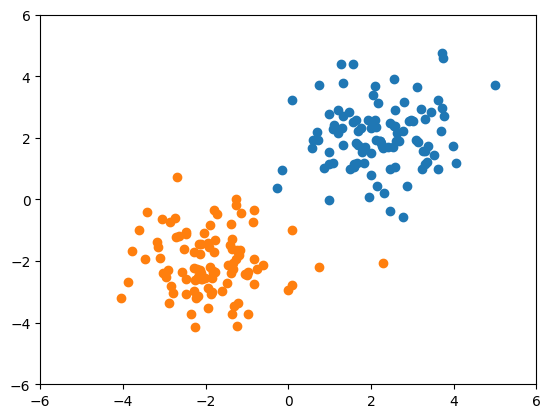


   Epoch: 1
     RMS: 0.02000
Accuracy: 0.98000

   Epoch: 2
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 3
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 4
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 5
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 6
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 7
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 8
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 9
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 10
     RMS: 0.00000
Accuracy: 1.00000


In [34]:
# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

import matplotlib.pyplot as plt
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

p = Perceptron(2,1)

p.train(X, d, 0.01, 10, 1)


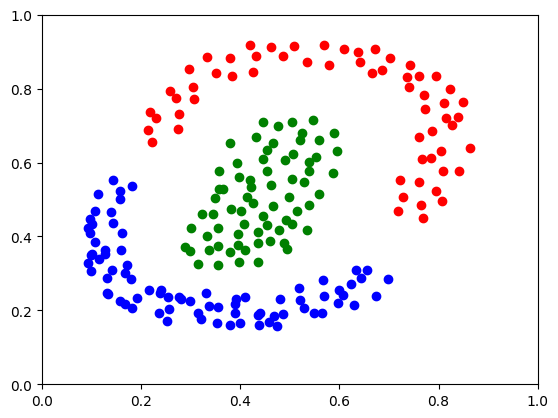

In [35]:
# regiones no lineales

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

p = Multilayer(ni,15,no)

# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt


In [36]:
# Orquideas

X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

p = Multilayer(ni,40,no)

# encontrar arquitectura mínima que aprende este problema

### Explicación de los archivos de datos suministrados

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?

#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una función lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

#### Morosos

Contiene datos de mnorosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?